# 什么是Pillow

PIL（Python Imaging Library）是Python常用的图像处理库.PIL功能非常强大，但API却非常简单易用。由于PIL仅支持到Python 2.7，加上年久失修，于是一群志愿者在PIL的基础上创建了兼容的版本，名字叫Pillow。

Pillow是PIL的一个友好Fork，提供了了广泛的文件格式支持，强大的图像处理能力，主要包括图像储存、图像显示、格式转换以及基本的图像处理操作等。


# 使用Pillow进行图像操作


## 读取并显示图像

在Pillow中显示图像有两种方式，第一种是先使用Pillow中的Image模块的open函数读取图片,再用Image类的show()方法展示图片：


In [ ]:
from PIL import Image
img=Image.open('./Demo.png')
img.show()


第二种是借助Python的第三方库matplotlib，用其自带的imshow()和show()方法显示图片：


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img=Image.open('./Demo.png')
%matplotlib inline  #用这条命令防止Jupyter返回内存地址，直接显示图片
plt.imshow(img)
plt.show()

显示效果如图：

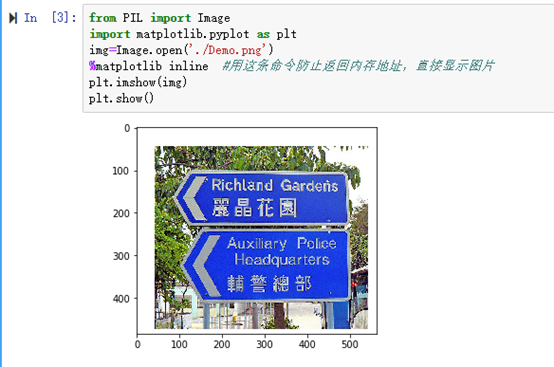

PS：标准版本的show()方法不是很有效率，因为它先将图像保存为一个临时文件，然后使用xv进行显示。如果没有安装xv，该函数甚至不能工作。所以我们一般采取第二种方式打开图片。

## 保存图像

在Pillow中保存图像十分简单，用save()方法即可：


In [ ]:
img=Image.open('./Demo.png')
img.save('Demo2.png')

保存效果如图：

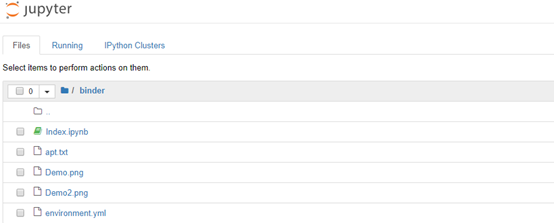

你可以更改save()函数中文件的后缀名，将其保存为不同格式的图片，如save（’Demo.jpeg’）等。

PS：你不能直接将PNG图片转为JPEG，因为PNG有RGBA四个通道，而JPEG是RGB三个通道，所以PNG转JPEG时候程序不知道如何处理通道，就会产生错误。

# 图像变换

## 旋转图像

Pillow提供两种方法让我们旋转图像，第一种是rotate()方法，它可以将图像顺时针旋转指定角度：


In [ ]:
img = img.rotate(45)  #可以更改数字，使图像旋转任意角度

旋转效果：

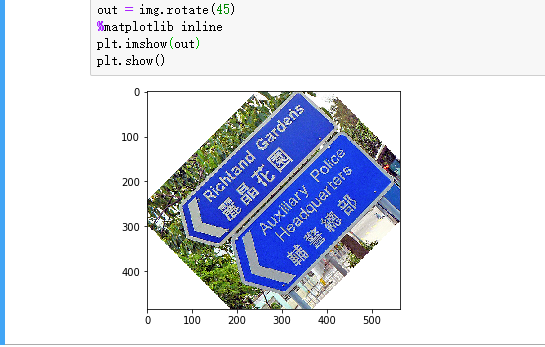

第二种是transpose()方法，它通过指定方法中的常量来使图像旋转：


In [ ]:
img = img.transpose(Image.ROTATE_90)  #此处的值只能取90、180和270

旋转效果：

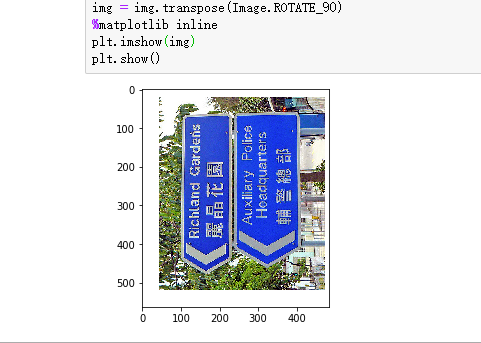

PS：transpose()和rotate()方法没有性能差别。

## 图像倒置

与第二种旋转方法类似，我们通过指定transpose()方法中的常量实现图像倒置：


In [ ]:
img = img.transpose(Image.FLIP_LEFT_RIGHT) #左右互换,上下互换改为 
                                           #Image.FLIP_TOP_BOTTOM

倒置效果：

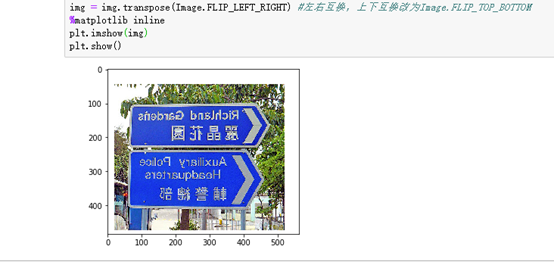

## 缩放图像

可以使用resize()方法将图像缩放到指定大小；


In [ ]:
img = img.resize((128, 128)) #将图像缩放到128*128像素大小

缩放效果：

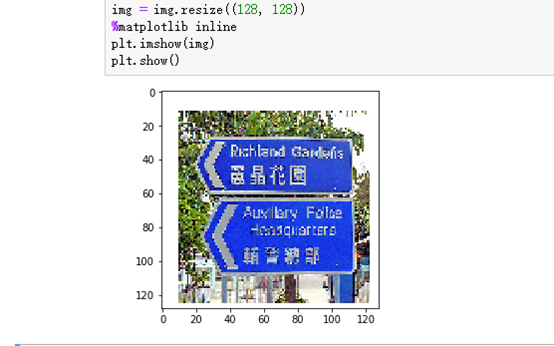

# 图像转换

Pillow自带了convert()方法可以将图像转换成不同格式，以转换灰度图为例：


In [ ]:
img = img.convert('L') #L为灰度图格式，此外还有1、RGB、F等八种格式

转换效果：

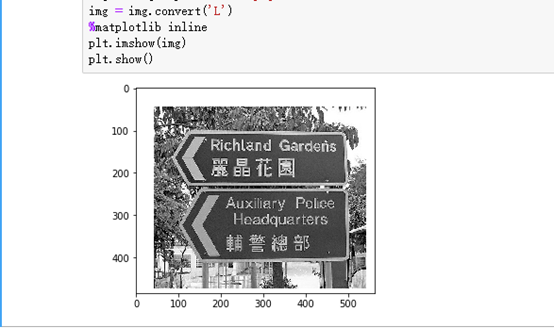

# 图像二值化

图像二值化（Image Binarization）就是将图像上的像素点的灰度值设置为0或255，也就是将整个图像呈现出明显的黑白效果的过程。

在数字图像处理中，二值图像占有非常重要的地位，图像的二值化使图像中数据量大为减少，从而能凸显出目标的轮廓。

在Pillow中，我们用point()方法对图像的每个像素点进行判断，根据其与均值的相对大小将其灰度值设置为0或255，再将其转化为二值图像。


In [ ]:
WHITE, BLACK = 255, 0   #定义灰度值常量
img = img.point(lambda x: WHITE if x > 128 else BLACK)  #对图像的每个像素点进行判断
img = img.convert('1')  #将图像转化为二值图

二值化效果：

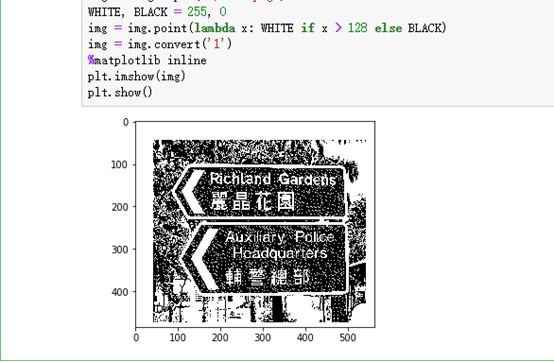

# 图像滤波

Python中的图像滤波，主要对图像进行平滑、锐化、边界增强等滤波处理。我们可以将其理解为手机中的滤镜。

Pillow中的滤波种类十分丰富，我们以浮雕滤波为例:

先引入Pillow中的滤波类：


In [ ]:
from PIL import Image,ImageFilter


调用浮雕滤波：


In [ ]:
img = img.filter(ImageFilter.EMBOSS)

浮雕滤波效果：

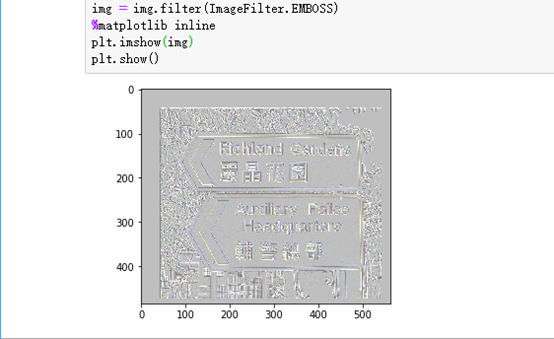

PS：Pillow中的滤波还有很多种，如模糊滤波ImageFilter.BLUR、轮廓滤波ImageFilter.CONTOUR、细节滤波ImageFilter.DETAIL、寻找边界滤波ImageFilter.FIND_EDGES等。